#  TP d'optimisation - Tom Chauvel

## Introduction

On va dans ce TP résoudre un problème de régression parabolique en cherchant les coefficients de notre parabole pour mieux approximer notre ensemble de points.

## Détermination du gradient

$
J(p) = \frac{1}{2} < A p , p > - <k,p>
$

$
J(p) = \frac{1}{2} p^T A^T p - k^T p = \frac{1}{2} p^T A p - k^T p
$


D'après la formule on trouve

$
\vec{\nabla} J(p) = \frac{1}{2} ( A + A^T ) p - k = \frac{1}{2} ( 2 \times A ) p - k = A p - k
$

On en déduit que

$
p^* = A^{-1} ( \vec{\nabla} J(p) + K )
$

Au point minimum de $J(p)$, $ \vec{\nabla} J(p) = \vec{0}$

D'où

$
p^* = A^{-1} K
$


## Vérification du minimum global et unique

D'après la formule on trouve :

$H(p) = \frac{1}{2} ( A + A^T ) = \frac{1}{2} ( 2 \times A ) = A$

Maintenant voyons les valeurs propres

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# déclaration des variables part 1

# matrice A
A = np.array([
   [1,1,1],
   [1,2,2],
   [1,2,3],
])

# matrice k
k = np.array([
   [1],
   [1],
   [1]
])

# valeurs propres positives, donc défini positive
print( np.linalg.eig(A).eigenvalues ) 

[5.04891734 0.64310413 0.30797853]


On obtient [5.04891734 0.64310413 0.30797853], toutes des valeurs positives.
Donc A est définie positive.

Or comme $H(p) = A$, alors $H(p)$ est définie positive.

Donc $H(p)$ est strictement convexe et en supposant que la fonction admet un minimum, alors ce minimum est global et unique. 

## Implémentation des algorithmes du gradient

In [22]:
def gradient(A,p,k):
    """
    gradient de notre fonction
    """
    return A @ p - k

def GradientConstant(A,k,alpha,tol,itermax):
    """
    algo du gradient à pas constant
    """
    erreur = []
    p = [ np.random.rand(len(k),1) ]

    for i in range(itermax):
        g = gradient(A,p[-1],k)

        p.append( p[-1] - alpha*g )
        erreur.append( np.linalg.norm(p[-1] - p[-2]) )

        if (erreur[-1] < tol) : 
            break
    
    return p,erreur,i+1

def GradientVariable(A,k,tol,itermax):
    """
    algo du gradient à pas variable
    """
    erreur = []
    p = [ np.random.rand(len(k),1) ]

    for i in range(itermax):
        g = gradient(A,p[-1],k)

        a2 = g.transpose() @ A @ g / 2
        a1 = k.transpose() @ g - p[-1].transpose() @ A @ g / 2 - g.transpose() @ A @ p[-1] / 2

        alpha = ( - a1 / 2 / a2)[0,0]

        p.append( p[-1] - alpha*g )

        erreur.append( np.linalg.norm(p[-1] - p[-2]) )

        if (erreur[-1] < tol) : 
            break
    
    return p,erreur,i+1

## Analyse des résultats

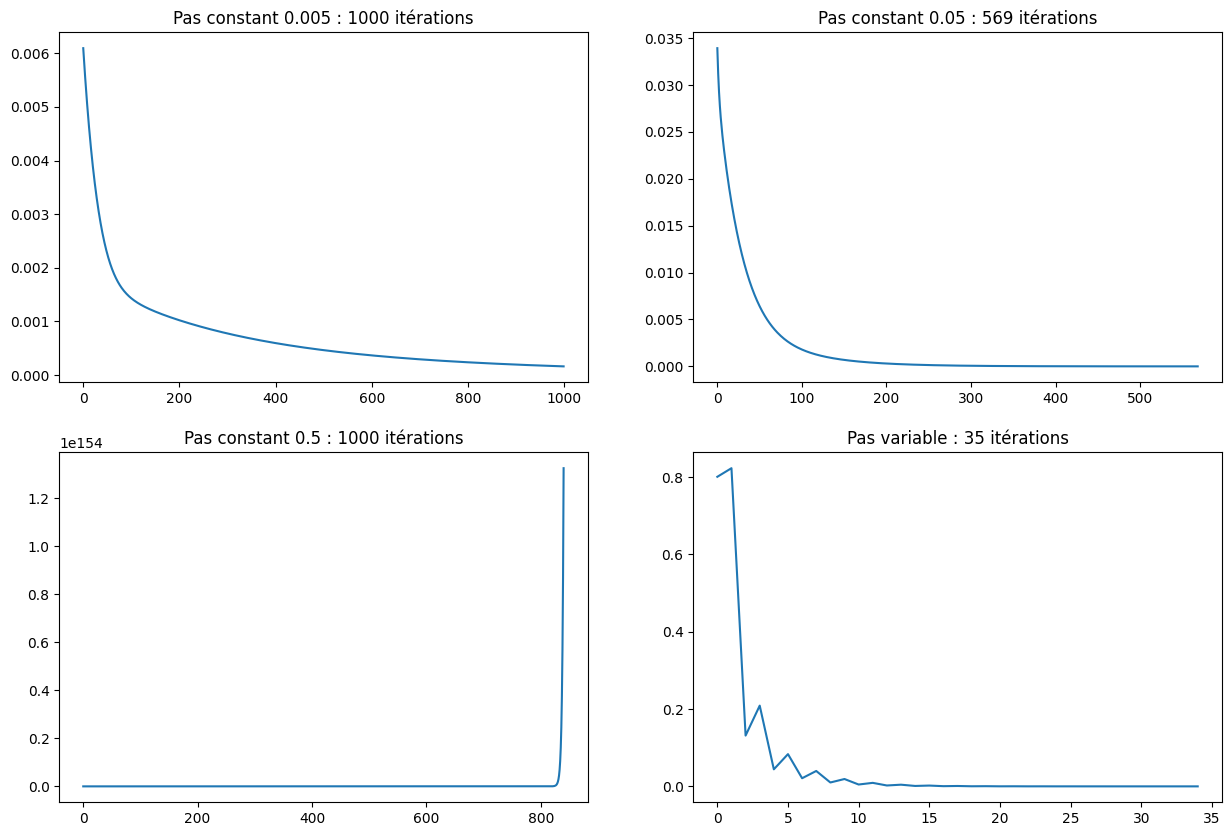

In [25]:
# déclaration des variables part 2

itermax = 1000
tol = 1e-6

# 4 cas
p1,e1,i1 = GradientConstant(A,k,0.005,tol,itermax)
p2,e2,i2 = GradientConstant(A,k,0.05,tol,itermax)
p3,e3,i3 = GradientConstant(A,k,0.5,tol,itermax)
p4,e4,i4 = GradientVariable(A,k,tol,itermax)

plt.rcParams['figure.figsize'] = [15, 10]
fig, axs = plt.subplots(2,2) # grille pour l'affichage

# affichage des cas
axs[0,0].plot(e1)
axs[0,0].set_title(f'Pas constant 0.005 : {i1} itérations')

axs[0,1].plot(e2)
axs[0,1].set_title(f'Pas constant 0.05 : {i2} itérations')

axs[1,0].plot(e3)
axs[1,0].set_title(f'Pas constant 0.5 : {i3} itérations')

axs[1,1].plot(e4)
axs[1,1].set_title(f'Pas variable : {i4} itérations')

plt.show()

In [28]:
print(p1[-1])
print(p2[-1])
print(p3[-1])
print(p4[-1])

[[ 0.92756666]
 [ 0.06420004]
 [-0.01924857]]
[[ 9.99962289e-01]
 [ 4.70151131e-05]
 [-2.09203517e-05]]
[[3.42053510e+182]
 [6.16359127e+182]
 [7.68587260e+182]]
[[ 9.99998488e-01]
 [ 1.84330193e-06]
 [-8.62071953e-07]]


Dans le cas du pas à 0.005, l'algorithme atteint 1000 itérations tout en convergent, donc ce pas est trop petit pour atteindre notre tolérence.
Dans le cas du pas à 0.05, l'algorithme atteint 569 itérations tout en convergent, donc on atteint notre tolérence, mais c'est quand même assez lent.
Dans le cas du pas à 0.5, l'algorithme atteint 1000 itérations tout en divergent, donc ce pas n'est pas du tout adapté car il ne permet pas de trouver notre minima.

Tandis qu'avec le pas variable, on obtient 35 itérations, donc on atteint notre tolérence tout en étant très rapide. 

## Conclusion

L'algorithme à pas variable est plus efficace et nous a permis de trouver nos coefficients de notre parabole sans avoir besoin de tester pleins de pas.